In [53]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [83]:
centroid = [(-5, -5), (5, 5), (-2.5, 2.5)]
cluster_Std = [1, 1, 1]
X, y = make_blobs(n_samples = 100, cluster_std=cluster_Std, centers = centroid, n_features = 2, random_state = 1)

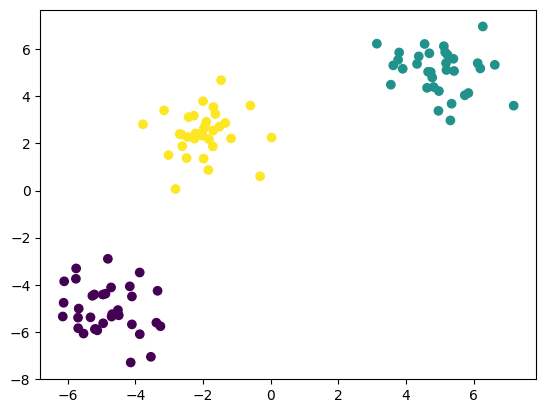

In [84]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [85]:
import random 

class Kmeans:
    def __init__(self, n_clusters = 2, max_iter = 100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index =  random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        for i in range (self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)
            if (old_centroids == self.centroids).all():
                break
        return cluster_group
            
    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)
    
    def move_centroids(self, X, cluster_group):
        new_centroid = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroid.append(X[cluster_group == type].mean(axis = 0))

        return np.array(new_centroid)

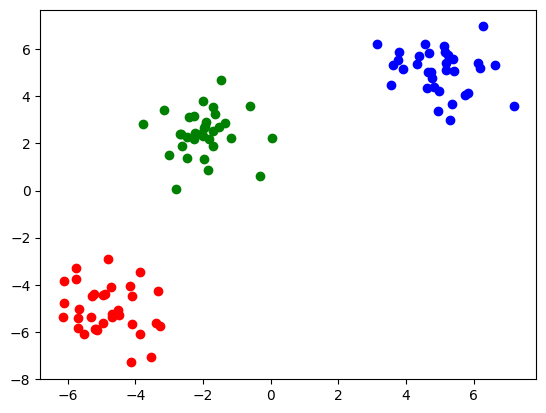

In [88]:
km = Kmeans(n_clusters = 3, max_iter=100)
y_pred = km.fit_predict(X)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], color='blue')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='red')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], color='green')